<a href="https://colab.research.google.com/github/vbloise3/kaggle/blob/master/LinearRegressionWithTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
# Use SageMaker
SageMaker = False

if not SageMaker:
    from google.colab import drive
    drive.mount('/content/drive')
    #!ls "/content/drive/My Drive/LSTM Futures"
    #!cp '/content/drive/My Drive/LSTM Futures/Micro-Emini-SP500-MES-F-granular' + bt_frag + '.csv' 'Micro-Emini-SP500-MES-F-granular' + bt_frag + '.csv'
    #!cp '/content/drive/My Drive/LSTM Futures/daily-granular' + bt_frag + '.csv' 'daily-granular' + bt_frag + '.csv'
    sales_data = pd.read_csv('/content/drive/My Drive/LSTM Futures/book_sales.csv')
else:
    import boto3
    from sagemaker import get_execution_role
    import sagemaker
    sagemaker_session = sagemaker.Session()
    role = get_execution_role()
    bucket='eminisp500vbloise'
    train_data_key = 'book_sales.csv'
    #inference_data_key = 'daily-granular.csv'
    train_data_location = 's3://{}/{}'.format(bucket, train_data_key)
    #inference_data_location = 's3://{}/{}'.format(bucket, inference_data_key)
    sales_data = pd.read_csv(train_data_location)

df = pd.read_csv(
    "/content/drive/My Drive/LSTM Futures/book_sales.csv",
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)

df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [23]:
df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


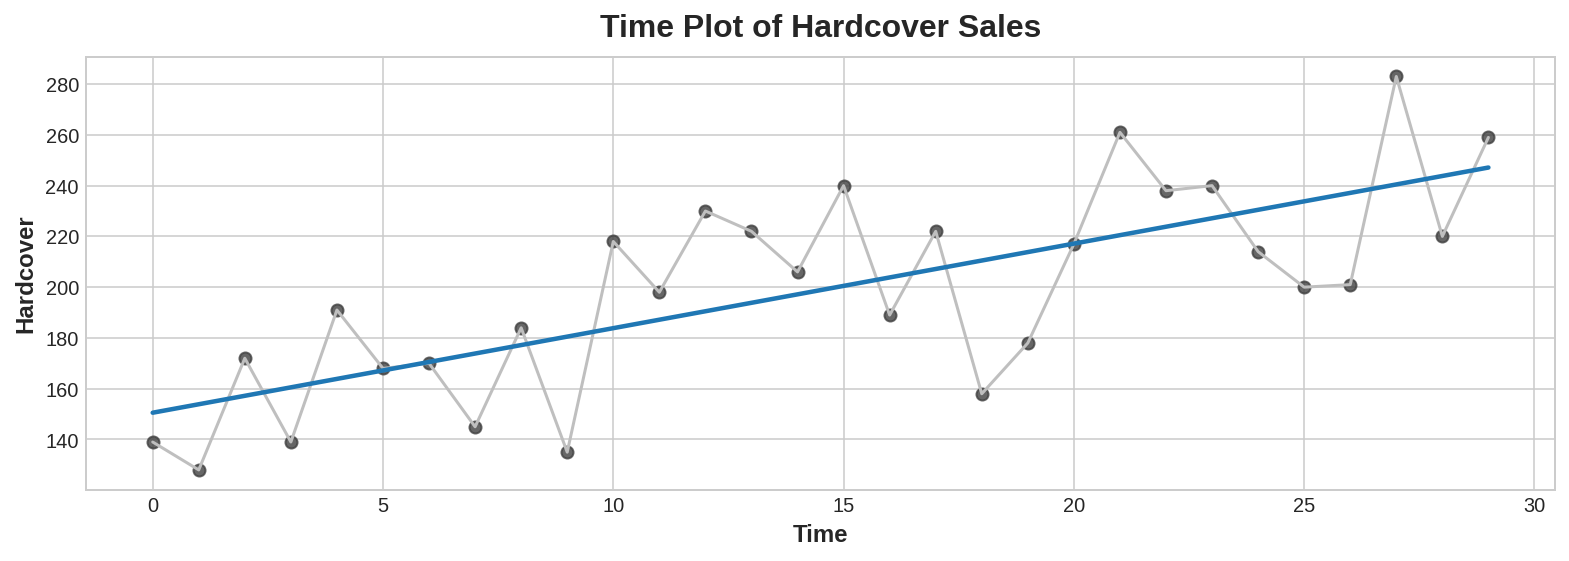

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');